In [1]:
%matplotlib widget

import json
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from notebook_utils import *

import wandb
df_cache = {}

In [2]:
ACQ = "acquire_pairs_function"
WIN_RATE = "post_training_m/eval_T0.25/win_rate"

tag = "tldr-exp5-final1"
#tag = "tldr-final"
logx = False

all_dfs = []

for run in wandb.Api().runs("bbnn/wm-apl-tldr"):
    if tag in run.tags:
        print(run.name, run.state)
        cfg = json.loads(run.json_config)
        df = df_cache.get(run.id)
        if df is None:        
            df = pd.DataFrame(run.scan_history())
            if WIN_RATE in df.columns:
                cols = ["m", WIN_RATE]
                df = df[cols]
                df['m'] = df['m'].fillna(method="ffill")
                df = df[~df[WIN_RATE].isnull()]
                df["m"] = df["m"].astype(int)
                df["acq"] = cfg["exp5"]["value"]["acquire_pairs_function"]
                df["seed"] = int(cfg["seed"]["value"])
                df["win_rate"] = df[WIN_RATE]
                if run.state == "finished":
                    df_cache[run.id] = df
        
        all_dfs.append(df)

df = pd.concat(all_dfs)
df = df[df.m <= 1024]

bright-music-233 finished
drawn-wave-232 finished
iconic-salad-231 finished
quiet-dawn-224 finished
peachy-jazz-223 finished
rosy-flower-222 finished
cool-shadow-221 finished
astral-snowball-220 finished
true-jazz-219 finished
volcanic-fire-218 finished
honest-silence-217 finished
rich-bush-216 finished


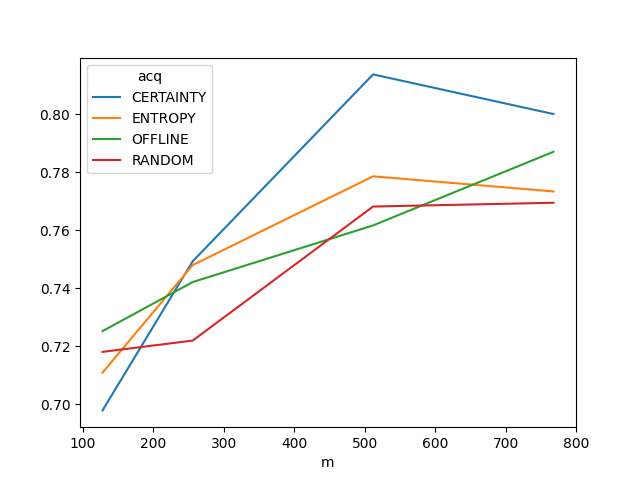

In [3]:
df.groupby(["m", "acq"])[WIN_RATE].mean().unstack().plot(logx=logx);

In [4]:
df_agg = df.groupby(["m", "acq"])[WIN_RATE].agg([np.mean, np.std, len]).reset_index()
df_agg['stderr'] = df_agg['std'] / df_agg['len']**0.5
display(df_agg.sort_values(['m', 'acq']))

,m,acq,mean,std,len,stderr
0,128,CERTAINTY,0.697917,0.063779,3,0.036823
1,128,ENTROPY,0.710938,0.028371,3,0.016380
2,128,OFFLINE,0.725260,0.013295,3,0.007676
3,128,RANDOM,0.718099,0.043513,3,0.025122
4,256,CERTAINTY,0.749349,0.010757,3,0.006211
5,256,ENTROPY,0.748047,0.021126,3,0.012197
6,256,OFFLINE,0.742188,0.008513,3,0.004915
7,256,RANDOM,0.722005,0.059316,3,0.034246
8,512,CERTAINTY,0.813802,0.021953,3,0.012674
9,512,ENTROPY,0.778646,0.029898,3,0.017262


In [5]:
# def key_to_color(key):
#     return {
#         "ENTROPY": 'orange', 
#         "CERTAINTY": 'green', 
#         "UNCERTAINTY": 'blue',
#         "OFFLINE": 'black',
#         "RANDOM": 'gray', 
#         "TAILS_UNCERTAINTY": 'pink',
#         "MID_UNCERTAINTY": 'purple',  
#     }[key]

# def key_to_nice_name(key):
#     return {
#         "ENTROPY": 'Active-Predictive-Entropy', 
#         "CERTAINTY": 'Active-R-Certainty', 
#         "UNCERTAINTY": 'Active-R-Uncertainty',
#         "OFFLINE": 'Offline-Random',
#         "RANDOM": 'Online-Random',
#         "TAILS_UNCERTAINTY": 'pink',
#         "MID_UNCERTAINTY": 'purple',  
#     }[key]


# def plot_winrate(df, df_agg, keys):
#     plot_winrate_grid(df, df_agg, [keys])


# def plot_winrate_grid(df, df_agg, series: list[list[str]], output_path=None):
#     m_s = sorted(list(set(df.m)))
#     nrows=math.ceil(len(series)/2.0)
#     ncols=2

#     fig, axs = plt.subplots(figsize=(10, 5 * nrows), nrows=nrows, ncols=ncols)

#     if nrows == 1:
#         axs = [axs]
#     axs = [ax for r in axs for ax in r]

#     for i, ax in enumerate(axs):
#         ax.title.set_text("(" + chr(ord('c') + i) + ")")

#     for ax, keys in zip(axs, series):
#         for key, group in df_agg.groupby(ACQ):
#             if key in keys:
#                 group.plot('m', 'mean', yerr='stderr', alpha=0.5, label=key_to_nice_name(key), ax=ax, capsize=2.0, color=key_to_color(key))
#                 df[df[ACQ] == key].plot.scatter(
#                     color=key_to_color(key), ax=ax, marker='x', s=10, x='m', y=WIN_RATE)

#         ax.set_xticks(m_s)
#         ax.set_xticklabels(m_s)
#         ax.set_ylim(0.625, 0.85)
#         ax.tick_params(axis='x',which='minor',bottom=False)
#         ax.set_ylabel("Win-rate (%)")
#         #ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#         ax.set_yticklabels([f"{int(x*100)}" for x in ax.get_yticks()])

#     fig.suptitle("TLDR win-rate (N=512) vs ref model completions")
#     fig.tight_layout()
#     if output_path is not None:
#         fig.savefig(output_path)

#     plt.show()

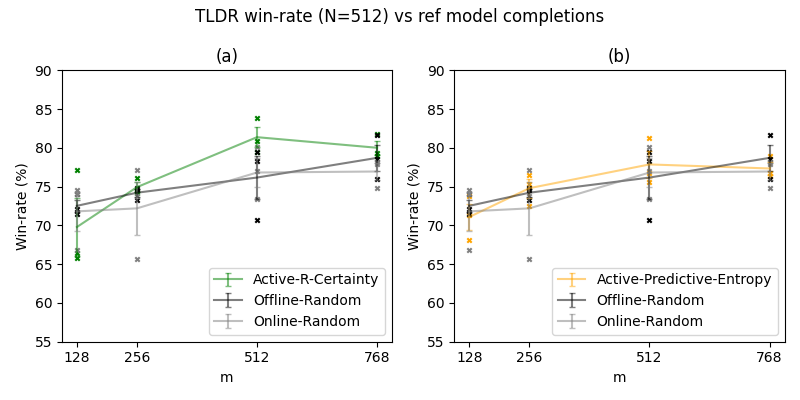

In [8]:
plot_winrate_grid(df, df_agg, [
                      ["OFFLINE", "RANDOM", "CERTAINTY"],
                      ["OFFLINE", "RANDOM", "ENTROPY"],
    ], 
                  output_path="tldr-final-vs-refmodel.png",
                  figwidth=8,
                  title="TLDR win-rate (N=512) vs ref model completions",
                  acq="acq",
                 
                 )


In [11]:


agg_df = df.groupby(["acq", "m"])[WIN_RATE].agg(["count", "mean", "std"])

for BASELINE in ["OFFLINE", "RANDOM"]:
    def do_ttest(g):
        m = g["m"].iloc[0]
        bdf = df[(df["acq"] == BASELINE) & (df["m"] == m)]
        return stats.ttest_ind(g[WIN_RATE], bdf[WIN_RATE]).pvalue

    def diff_mean(g):
        m = g["m"].iloc[0]
        bdf = df[(df["acq"] == BASELINE) & (df["m"] == m)]
        return g[WIN_RATE].mean() - bdf[WIN_RATE].mean()

    def diff_mean_std(g):
        m = g["m"].iloc[0]
        bdf = df[(df["acq"] == BASELINE) & (df["m"] == m)]
        return (g[WIN_RATE].std()**2 + bdf[WIN_RATE].std()**2)**0.5

    agg_df[f"effect_vs_{BASELINE}"] = df.groupby(["acq", "m"]).apply(diff_mean)
    agg_df[f"std_effect_vs_{BASELINE}"] = df.groupby(["acq", "m"]).apply(diff_mean_std)
    agg_df[f"pvalue_vs_{BASELINE}"] = df.groupby(["acq", "m"]).apply(do_ttest)


agg_df

count      mean       std  effect_vs_OFFLINE  \
acq       m                                                   
CERTAINTY 128      3  0.697917  0.063779          -0.027344   
          256      3  0.749349  0.010757           0.007161   
          512      3  0.813802  0.021953           0.052083   
          768      3  0.800130  0.015907           0.013021   
ENTROPY   128      3  0.710938  0.028371          -0.014323   
          256      3  0.748047  0.021126           0.005859   
          512      3  0.778646  0.029898           0.016927   
          768      3  0.773438  0.013672          -0.013672   
OFFLINE   128      3  0.725260  0.013295           0.000000   
          256      3  0.742188  0.008513           0.000000   
          512      3  0.761719  0.047722           0.000000   
          768      3  0.787109  0.028371           0.000000   
RANDOM    128      3  0.718099  0.043513          -0.007161   
          256      3  0.722005  0.059316          -0.020182   
          512      3  0.768229  0.033222           0.006510   
          768      3  0.769531  0.018632          -0.017578   

               std_effect_vs_OFFLINE  pvalue_vs_OFFLINE  effect_vs_RANDOM  \
acq       m                                                                 
CERTAINTY 128               0.065150           0.507517         -0.020182   
          256               0.013718           0.417026          0.027344   
          512               0.052529           0.161048          0.045573   
          768               0.032526           0.526232          0.030599   
ENTROPY   128               0.031331           0.472787         -0.007161   
          256               0.022777           0.678963          0.026042   
          512               0.056314           0.630118          0.010417   
          768               0.031493           0.493924          0.003906   
OFFLINE   128               0.018801           1.000000          0.007161   
          256               0.012040           1.000000          0.020182   
          512               0.067489           1.000000         -0.006510   
          768               0.040122           1.000000          0.017578   
RANDOM    128               0.045498           0.798637          0.000000   
          256               0.059924           0.590966          0.000000   
          512               0.058147           0.855682          0.000000   
          768               0.033942           0.420419          0.000000   

               std_effect_vs_RANDOM  pvalue_vs_RANDOM  
acq       m                                            
CERTAINTY 128              0.077208          0.674192  
          256              0.060284          0.476010  
          512              0.039820          0.118492  
          768              0.024499          0.096526  
ENTROPY   128              0.051945          0.823002  
          256              0.062966          0.513376  
          512              0.044695          0.707101  
          768              0.023110          0.784257  
OFFLINE   128              0.045498          0.798637  
          256              0.059924          0.590966  
          512              0.058147          0.855682  
          768              0.033942          0.420419  
RANDOM    128              0.061536          1.000000  
          256              0.083886          1.000000  
          512              0.046983          1.000000  
          768              0.026349          1.000000

In [12]:
print(agg_df[["effect_vs_RANDOM", "std_effect_vs_RANDOM"]].to_latex())

\begin{tabular}{llrr}
\toprule
       &     &  effect\_vs\_RANDOM &  std\_effect\_vs\_RANDOM \\
acq & m &                   &                       \\
\midrule
CERTAINTY & 128 &         -0.020182 &              0.077208 \\
       & 256 &          0.027344 &              0.060284 \\
       & 512 &          0.045573 &              0.039820 \\
       & 768 &          0.030599 &              0.024499 \\
ENTROPY & 128 &         -0.007161 &              0.051945 \\
       & 256 &          0.026042 &              0.062966 \\
       & 512 &          0.010417 &              0.044695 \\
       & 768 &          0.003906 &              0.023110 \\
OFFLINE & 128 &          0.007161 &              0.045498 \\
       & 256 &          0.020182 &              0.059924 \\
       & 512 &         -0.006510 &              0.058147 \\
       & 768 &          0.017578 &              0.033942 \\
RANDOM & 128 &          0.000000 &              0.061536 \\
       & 256 &          0.000000 &              0.08388

In [13]:
print(agg_df.reset_index().to_latex(index=False, float_format="%.03f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
      acq &   m &  count &  mean &   std &  effect\_vs\_OFFLINE &  std\_effect\_vs\_OFFLINE &  pvalue\_vs\_OFFLINE &  effect\_vs\_RANDOM &  std\_effect\_vs\_RANDOM &  pvalue\_vs\_RANDOM \\
\midrule
CERTAINTY & 128 &      3 & 0.698 & 0.064 &             -0.027 &                  0.065 &              0.508 &            -0.020 &                 0.077 &             0.674 \\
CERTAINTY & 256 &      3 & 0.749 & 0.011 &              0.007 &                  0.014 &              0.417 &             0.027 &                 0.060 &             0.476 \\
CERTAINTY & 512 &      3 & 0.814 & 0.022 &              0.052 &                  0.053 &              0.161 &             0.046 &                 0.040 &             0.118 \\
CERTAINTY & 768 &      3 & 0.800 & 0.016 &              0.013 &                  0.033 &              0.526 &             0.031 &                 0.024 &             0.097 \\
  ENTROPY & 128 &      3 & 0.711 & 0.028 &             -0.014 & 